# Praktikum 2
Padaa praktikum ini kita akan menggunakan library Keras untuk menggunakan JST. Keras adalah API tingkat tinggi untuk membangun JST dengan mudah, sedangkan TensorFlow adalah framework yang mendukung Keras.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding (compatibel dengan berbagai versi scikit-learn)
try:
    # scikit-learn < 1.2
    encoder = OneHotEncoder(sparse=False)
except TypeError:
    # scikit-learn >= 1.2
    encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Bangun model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Kompilasi
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=50, batch_size=8)

# Evaluasi
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc}")

Epoch 1/50


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3500 - loss: 1.1019  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3500 - loss: 1.1019  
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3500 - loss: 1.0876 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3500 - loss: 1.0876 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3667 - loss: 1.0797 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3667 - loss: 1.0797 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3250 - loss: 1.0727 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3250 - loss: 1.0727 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3583 - loss: 1.0669 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3583 - loss: 1.0669 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3667 - loss: 1.0567 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3667 - los

## Tugas 2

- Ubah jumlah neuron hidden layer.
- Bandingkan akurasi dengan konfigurasi awal.


Training: Konfigurasi Awal (10-8)


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.2855
Akurasi Test: 0.9333
Akurasi Train: 0.9792

Training: Konfigurasi 2 (16-12)
Loss: 0.1888
Akurasi Test: 0.9000
Akurasi Train: 0.9375

Training: Konfigurasi 3 (20-15-10)
Loss: 0.1888
Akurasi Test: 0.9000
Akurasi Train: 0.9375

Training: Konfigurasi 3 (20-15-10)
Loss: 0.2002
Akurasi Test: 1.0000
Akurasi Train: 0.9688

Training: Konfigurasi 4 (32-16)
Loss: 0.2002
Akurasi Test: 1.0000
Akurasi Train: 0.9688

Training: Konfigurasi 4 (32-16)
Loss: 0.1879
Akurasi Test: 1.0000
Akurasi Train: 0.9583

Training: Konfigurasi 5 (8-4)
Loss: 0.1879
Akurasi Test: 1.0000
Akurasi Train: 0.9583

Training: Konfigurasi 5 (8-4)
Loss: 0.5664
Akurasi Test: 0.9667
Akurasi Train: 0.9688

TABEL PERBANDINGAN HASIL
             Konfigurasi Hidden Layers   Loss Akurasi Test Akurasi Train
 Konfigurasi Awal (10-8)        10 → 8 0.2855       0.9333        0.9792
   Konfigurasi 2 (16-12)       16 → 12 0.1888       0.9000        0.9375
Konfigurasi 3 (20-15-10)  20 → 15 → 10 0.2002       1.0000        0.9688
 

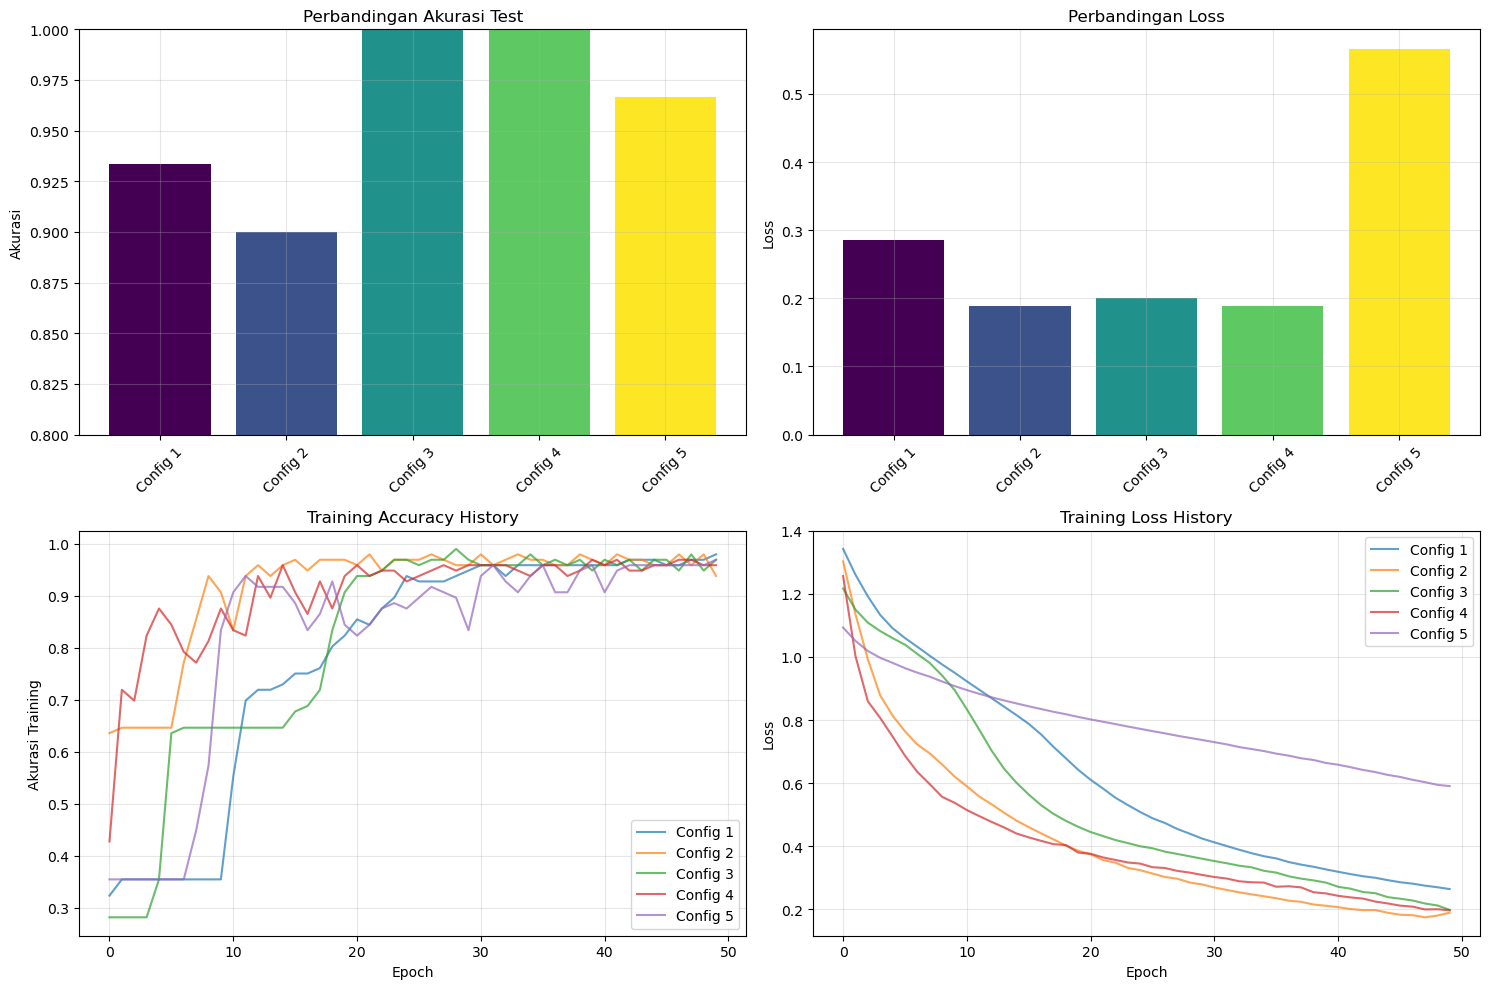


KESIMPULAN
Konfigurasi terbaik: Konfigurasi 3 (20-15-10)
  Hidden Layers: 20 → 15 → 10
  Akurasi Test: 1.0000
  Loss: 0.2002

Catatan:
- Konfigurasi dengan lebih banyak neuron tidak selalu lebih baik
- Overfitting bisa terjadi pada jaringan yang terlalu kompleks
- Untuk dataset kecil seperti Iris, arsitektur sederhana sudah cukup


In [ ]:
# ===== TUGAS 2: Perbandingan Konfigurasi Hidden Layer =====

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding (compatibel dengan berbagai versi scikit-learn)
try:
    encoder = OneHotEncoder(sparse=False)
except TypeError:
    encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data dengan random_state untuk reproduksibilitas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Konfigurasi yang akan diuji
configurations = [
    {'name': 'Konfigurasi Awal (10-8)', 'layers': [10, 8]},
    {'name': 'Konfigurasi 2 (16-12)', 'layers': [16, 12]},
    {'name': 'Konfigurasi 3 (20-15-10)', 'layers': [20, 15, 10]},
    {'name': 'Konfigurasi 4 (32-16)', 'layers': [32, 16]},
    {'name': 'Konfigurasi 5 (8-4)', 'layers': [8, 4]},
]

results = []

for config in configurations:
    print("\n" + "="*60)
    print(f"Training: {config['name']}")
    print("="*60)
    
    # Bangun model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(config['layers'][0], activation='relu', input_shape=(4,)))
    
    for neurons in config['layers'][1:]:
        model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    
    # Kompilasi
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Latih model dengan verbose=0 untuk output yang lebih bersih
    history = model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0, validation_split=0.2)
    
    # Evaluasi
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    # Simpan hasil
    results.append({
        'Konfigurasi': config['name'],
        'Hidden Layers': ' → '.join(map(str, config['layers'])),
        'Loss': loss,
        'Akurasi Test': acc,
        'Akurasi Train': history.history['accuracy'][-1],
        'History': history.history
    })
    
    print(f"Loss: {loss:.4f}")
    print(f"Akurasi Test: {acc:.4f}")
    print(f"Akurasi Train: {history.history['accuracy'][-1]:.4f}")

# Tampilkan tabel perbandingan
print("\n" + "="*60)
print("TABEL PERBANDINGAN HASIL")
print("="*60)
df_results = pd.DataFrame([{
    'Konfigurasi': r['Konfigurasi'],
    'Hidden Layers': r['Hidden Layers'],
    'Loss': f"{r['Loss']:.4f}",
    'Akurasi Test': f"{r['Akurasi Test']:.4f}",
    'Akurasi Train': f"{r['Akurasi Train']:.4f}"
} for r in results])
print(df_results.to_string(index=False))

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Perbandingan Akurasi Test
ax1 = axes[0, 0]
configs = [r['Konfigurasi'] for r in results]
accs_test = [r['Akurasi Test'] for r in results]
colors = plt.cm.viridis(np.linspace(0, 1, len(configs)))
ax1.bar(range(len(configs)), accs_test, color=colors)
ax1.set_xticks(range(len(configs)))
ax1.set_xticklabels([f"Config {i+1}" for i in range(len(configs))], rotation=45)
ax1.set_ylabel('Akurasi')
ax1.set_title('Perbandingan Akurasi Test')
ax1.set_ylim([0.8, 1.0])
ax1.grid(True, alpha=0.3)

# Plot 2: Perbandingan Loss
ax2 = axes[0, 1]
losses = [r['Loss'] for r in results]
ax2.bar(range(len(configs)), losses, color=colors)
ax2.set_xticks(range(len(configs)))
ax2.set_xticklabels([f"Config {i+1}" for i in range(len(configs))], rotation=45)
ax2.set_ylabel('Loss')
ax2.set_title('Perbandingan Loss')
ax2.grid(True, alpha=0.3)

# Plot 3: Training History - Akurasi
ax3 = axes[1, 0]
for i, r in enumerate(results):
    ax3.plot(r['History']['accuracy'], label=f"Config {i+1}", alpha=0.7)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Akurasi Training')
ax3.set_title('Training Accuracy History')
ax3.legend(loc='lower right')
ax3.grid(True, alpha=0.3)

# Plot 4: Training History - Loss
ax4 = axes[1, 1]
for i, r in enumerate(results):
    ax4.plot(r['History']['loss'], label=f"Config {i+1}", alpha=0.7)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.set_title('Training Loss History')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("KESIMPULAN")
print("="*60)
best_config = max(results, key=lambda x: x['Akurasi Test'])
print(f"Konfigurasi terbaik: {best_config['Konfigurasi']}")
print(f"  Hidden Layers: {best_config['Hidden Layers']}")
print(f"  Akurasi Test: {best_config['Akurasi Test']:.4f}")
print(f"  Loss: {best_config['Loss']:.4f}")
print("\nCatatan:")
print("- Konfigurasi dengan lebih banyak neuron tidak selalu lebih baik")
print("- Overfitting bisa terjadi pada jaringan yang terlalu kompleks")
print("- Untuk dataset kecil seperti Iris, arsitektur sederhana sudah cukup")

## Tugas 3

- Bandingkan Sigmoid vs ReLU pada dataset Iris.
- Catat perbedaan loss dan akurasi.


Training dengan aktivasi: ReLU


c:\Users\rafir\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss: 0.2856
Akurasi Test: 1.0000
Akurasi Train: 0.9271
Val Accuracy: 0.9583

Training dengan aktivasi: Sigmoid
Loss: 0.5416
Akurasi Test: 0.6333
Akurasi Train: 0.7188
Val Accuracy: 0.5000

Training dengan aktivasi: Tanh
Loss: 0.5416
Akurasi Test: 0.6333
Akurasi Train: 0.7188
Val Accuracy: 0.5000

Training dengan aktivasi: Tanh
Loss: 0.1476
Akurasi Test: 1.0000
Akurasi Train: 0.9792
Val Accuracy: 1.0000

Training dengan aktivasi: ELU
Loss: 0.1476
Akurasi Test: 1.0000
Akurasi Train: 0.9792
Val Accuracy: 1.0000

Training dengan aktivasi: ELU
Loss: 0.1565
Akurasi Test: 0.9333
Akurasi Train: 0.9583
Val Accuracy: 1.0000

TABEL PERBANDINGAN FUNGSI AKTIVASI
Aktivasi   Loss Akurasi Test Akurasi Train Val Accuracy
    ReLU 0.2856       1.0000        0.9271       0.9583
 Sigmoid 0.5416       0.6333        0.7188       0.5000
    Tanh 0.1476       1.0000        0.9792       1.0000
     ELU 0.1565       0.9333        0.9583       1.0000
Loss: 0.1565
Akurasi Test: 0.9333
Akurasi Train: 0.9583
Val A

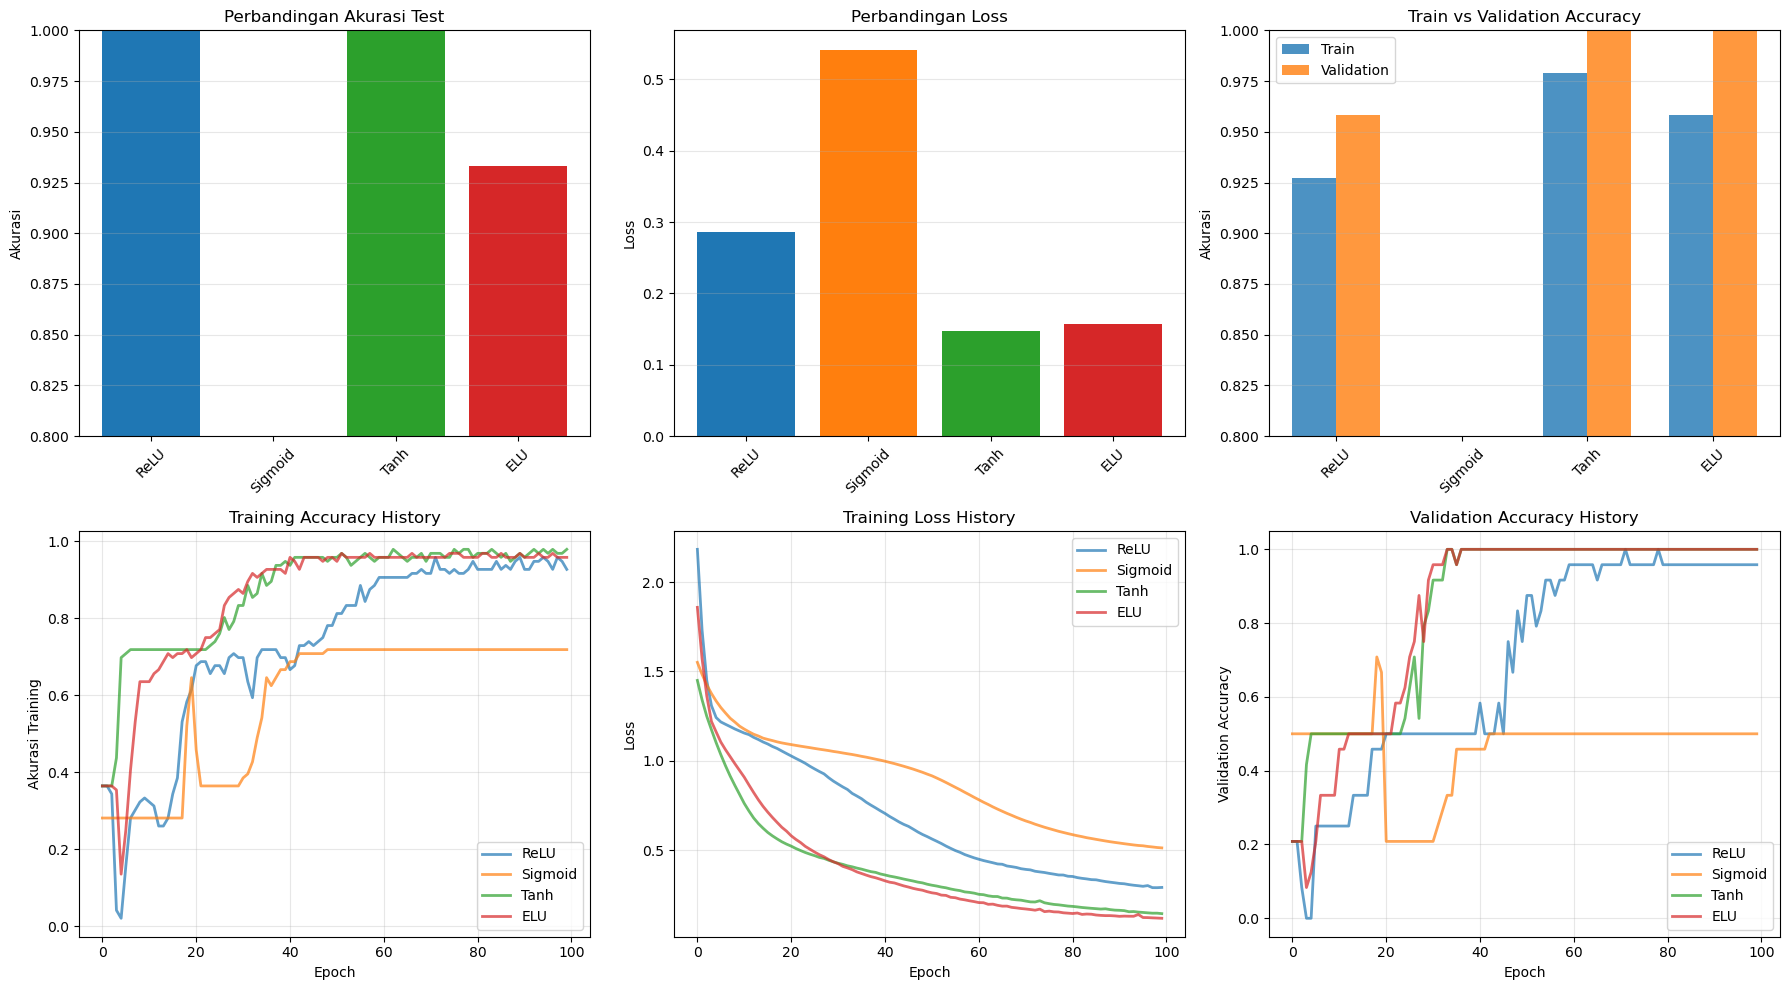


ANALISIS KONVERGENSI
ReLU:
  Akurasi Awal: 0.3646
  Akurasi Akhir: 0.9271
  Peningkatan: 0.5625
  Epoch ke-90% akurasi: 59

Sigmoid:
  Akurasi Awal: 0.2812
  Akurasi Akhir: 0.7188
  Peningkatan: 0.4375
  Epoch ke-90% akurasi: 100

Tanh:
  Akurasi Awal: 0.3646
  Akurasi Akhir: 0.9792
  Peningkatan: 0.6146
  Epoch ke-90% akurasi: 34

ELU:
  Akurasi Awal: 0.3646
  Akurasi Akhir: 0.9583
  Peningkatan: 0.5937
  Epoch ke-90% akurasi: 32

KESIMPULAN
Fungsi aktivasi terbaik: ReLU
  Akurasi Test: 1.0000
  Loss: 0.2856
  Validation Accuracy: 0.9583

Perbandingan Detail ReLU vs Sigmoid:

ReLU:
  - Akurasi Test: 1.0000
  - Loss: 0.2856
  - Val Accuracy: 0.9583
  - Kelebihan: Komputasi cepat, menghindari vanishing gradient
  - Kekurangan: Dead neurons jika learning rate terlalu tinggi

Sigmoid:
  - Akurasi Test: 0.6333
  - Loss: 0.5416
  - Val Accuracy: 0.5000
  - Kelebihan: Output range [0,1], smooth gradient
  - Kekurangan: Vanishing gradient, komputasi lebih lambat

Perbedaan Performa:
  - Seli

In [ ]:
# ===== TUGAS 3: Perbandingan Fungsi Aktivasi (Sigmoid vs ReLU) =====

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
iris = pd.read_csv('../data/iris.csv')
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values.reshape(-1, 1)

# One-hot encoding
try:
    encoder = OneHotEncoder(sparse=False)
except TypeError:
    encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split data dengan random_state untuk reproduksibilitas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk membuat dan melatih model dengan aktivasi tertentu
def train_with_activation(activation_name, activation_func, X_train, y_train, X_test, y_test):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation=activation_func, input_shape=(4,)),
        tf.keras.layers.Dense(8, activation=activation_func),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, validation_split=0.2)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    
    return history, loss, acc

# Fungsi aktivasi yang akan diuji
activations = [
    {'name': 'ReLU', 'func': 'relu'},
    {'name': 'Sigmoid', 'func': 'sigmoid'},
    {'name': 'Tanh', 'func': 'tanh'},
    {'name': 'ELU', 'func': 'elu'}
]

results_activation = []
histories = {}

for activation in activations:
    print("\n" + "="*60)
    print(f"Training dengan aktivasi: {activation['name']}")
    print("="*60)
    
    history, loss, acc = train_with_activation(
        activation['name'], 
        activation['func'], 
        X_train, y_train, X_test, y_test
    )
    
    # Simpan hasil
    results_activation.append({
        'Aktivasi': activation['name'],
        'Loss': loss,
        'Akurasi Test': acc,
        'Akurasi Train': history.history['accuracy'][-1],
        'Val Loss': history.history['val_loss'][-1],
        'Val Accuracy': history.history['val_accuracy'][-1]
    })
    
    histories[activation['name']] = history.history
    
    print(f"Loss: {loss:.4f}")
    print(f"Akurasi Test: {acc:.4f}")
    print(f"Akurasi Train: {history.history['accuracy'][-1]:.4f}")
    print(f"Val Accuracy: {history.history['val_accuracy'][-1]:.4f}")

# Tampilkan tabel perbandingan
print("\n" + "="*60)
print("TABEL PERBANDINGAN FUNGSI AKTIVASI")
print("="*60)
df_activation = pd.DataFrame([{
    'Aktivasi': r['Aktivasi'],
    'Loss': f"{r['Loss']:.4f}",
    'Akurasi Test': f"{r['Akurasi Test']:.4f}",
    'Akurasi Train': f"{r['Akurasi Train']:.4f}",
    'Val Accuracy': f"{r['Val Accuracy']:.4f}"
} for r in results_activation])
print(df_activation.to_string(index=False))

# Visualisasi perbandingan detail
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Perbandingan Akurasi Test
ax1 = axes[0, 0]
activation_names = [r['Aktivasi'] for r in results_activation]
accs = [r['Akurasi Test'] for r in results_activation]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ax1.bar(activation_names, accs, color=colors)
ax1.set_ylabel('Akurasi')
ax1.set_title('Perbandingan Akurasi Test')
ax1.set_ylim([0.8, 1.0])
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Perbandingan Loss
ax2 = axes[0, 1]
losses = [r['Loss'] for r in results_activation]
ax2.bar(activation_names, losses, color=colors)
ax2.set_ylabel('Loss')
ax2.set_title('Perbandingan Loss')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Training vs Validation Accuracy
ax3 = axes[0, 2]
train_accs = [r['Akurasi Train'] for r in results_activation]
val_accs = [r['Val Accuracy'] for r in results_activation]
x_pos = np.arange(len(activation_names))
width = 0.35
ax3.bar(x_pos - width/2, train_accs, width, label='Train', alpha=0.8)
ax3.bar(x_pos + width/2, val_accs, width, label='Validation', alpha=0.8)
ax3.set_ylabel('Akurasi')
ax3.set_title('Train vs Validation Accuracy')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(activation_names, rotation=45)
ax3.legend()
ax3.set_ylim([0.8, 1.0])
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Training Accuracy History
ax4 = axes[1, 0]
for name, color in zip(histories.keys(), colors):
    ax4.plot(histories[name]['accuracy'], label=name, alpha=0.7, color=color, linewidth=2)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Akurasi Training')
ax4.set_title('Training Accuracy History')
ax4.legend(loc='lower right')
ax4.grid(True, alpha=0.3)

# Plot 5: Training Loss History
ax5 = axes[1, 1]
for name, color in zip(histories.keys(), colors):
    ax5.plot(histories[name]['loss'], label=name, alpha=0.7, color=color, linewidth=2)
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Loss')
ax5.set_title('Training Loss History')
ax5.legend(loc='upper right')
ax5.grid(True, alpha=0.3)

# Plot 6: Validation Accuracy History
ax6 = axes[1, 2]
for name, color in zip(histories.keys(), colors):
    ax6.plot(histories[name]['val_accuracy'], label=name, alpha=0.7, color=color, linewidth=2)
ax6.set_xlabel('Epoch')
ax6.set_ylabel('Validation Accuracy')
ax6.set_title('Validation Accuracy History')
ax6.legend(loc='lower right')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis konvergensi
print("\n" + "="*60)
print("ANALISIS KONVERGENSI")
print("="*60)
for name in histories.keys():
    initial_acc = histories[name]['accuracy'][0]
    final_acc = histories[name]['accuracy'][-1]
    improvement = final_acc - initial_acc
    
    # Hitung kecepatan konvergensi (epoch untuk mencapai 90% akurasi)
    epochs_to_90 = next((i for i, acc in enumerate(histories[name]['accuracy']) if acc >= 0.9), 100)
    
    print(f"{name}:")
    print(f"  Akurasi Awal: {initial_acc:.4f}")
    print(f"  Akurasi Akhir: {final_acc:.4f}")
    print(f"  Peningkatan: {improvement:.4f}")
    print(f"  Epoch ke-90% akurasi: {epochs_to_90}")
    print()

print("="*60)
print("KESIMPULAN")
print("="*60)
best_activation = max(results_activation, key=lambda x: x['Akurasi Test'])
print(f"Fungsi aktivasi terbaik: {best_activation['Aktivasi']}")
print(f"  Akurasi Test: {best_activation['Akurasi Test']:.4f}")
print(f"  Loss: {best_activation['Loss']:.4f}")
print(f"  Validation Accuracy: {best_activation['Val Accuracy']:.4f}")

print("\nPerbandingan Detail ReLU vs Sigmoid:")
relu_result = next(r for r in results_activation if r['Aktivasi'] == 'ReLU')
sigmoid_result = next(r for r in results_activation if r['Aktivasi'] == 'Sigmoid')

print(f"\nReLU:")
print(f"  - Akurasi Test: {relu_result['Akurasi Test']:.4f}")
print(f"  - Loss: {relu_result['Loss']:.4f}")
print(f"  - Val Accuracy: {relu_result['Val Accuracy']:.4f}")
print(f"  - Kelebihan: Komputasi cepat, menghindari vanishing gradient")
print(f"  - Kekurangan: Dead neurons jika learning rate terlalu tinggi")

print(f"\nSigmoid:")
print(f"  - Akurasi Test: {sigmoid_result['Akurasi Test']:.4f}")
print(f"  - Loss: {sigmoid_result['Loss']:.4f}")
print(f"  - Val Accuracy: {sigmoid_result['Val Accuracy']:.4f}")
print(f"  - Kelebihan: Output range [0,1], smooth gradient")
print(f"  - Kekurangan: Vanishing gradient, komputasi lebih lambat")

# Hitung perbedaan performa
acc_diff = relu_result['Akurasi Test'] - sigmoid_result['Akurasi Test']
loss_diff = sigmoid_result['Loss'] - relu_result['Loss']

print(f"\nPerbedaan Performa:")
print(f"  - Selisih Akurasi (ReLU - Sigmoid): {acc_diff:+.4f}")
print(f"  - Selisih Loss (Sigmoid - ReLU): {loss_diff:+.4f}")

print("\nRekomendasi:")
print("✓ Gunakan ReLU untuk hidden layers (performa dan kecepatan lebih baik)")
print("✓ Sigmoid cocok untuk output layer pada binary classification")
print("✓ Tanh bisa jadi alternatif karena zero-centered")
print("✓ ELU mengatasi masalah dead neurons pada ReLU dengan smooth gradient")